# Reconnaissance de chiffres manuscrits : MNIST

## Librairies et fonctions utiles

In [8]:
# Directive pour afficher les graphiques dans Jupyter
%matplotlib inline

In [9]:
# Pandas : librairie de manipulation de données
# NumPy : librairie de calcul scientifique
# MatPlotLib : librairie de visualisation et graphiques
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split

from IPython.core.display import HTML # permet d'afficher du code html dans jupyter

Fonction pour tracer les courbes d'apprentissage sur l'ensemble d'apprentissage et l'ensemble de validation :

In [10]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(est, X_train, y_train) :
    train_sizes, train_scores, test_scores = learning_curve(estimator=est, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        n_jobs=-1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.figure(figsize=(8,10))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
    plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
    plt.grid(b='on')
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([0.6, 1.0])
    plt.show()

Fonction pour tracer la courbe ROC :

In [11]:
def plot_roc_curve(est,X_test,y_test) :
    probas = est.predict_proba(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,probas[:, 1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.figure(figsize=(8,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')        # plus mauvaise courbe
    plt.plot([0,0,1],[0,1,1],'g:')     # meilleure courbe
    plt.xlim([-0.05,1.2])
    plt.ylim([-0.05,1.2])
    plt.ylabel('Taux de vrais positifs')
    plt.xlabel('Taux de faux positifs')
    plt.show

## Le dataset de chiffres manuscrits MNIST

On charge le dataset MNIST :

In [12]:
df = pd.read_csv("../input/mnist-in-csv/mnist_test.csv")

In [13]:
df.shape

(10000, 785)

On a 785 colonnes :
* une colonne 'label' identifiant le chiffre  
* et 784 colonnes de pixels (image de 28x28 pixels "aplatie")

In [14]:
df.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


On crée la cible y (colonne 'label') :

In [15]:
y = df['label']

et les caractéristiques X :

In [16]:
X = df.drop(['label'], axis=1)

On sépare les ensembles d'apprentissage et de test :

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

On peut maintenant appliquer les méthodes de machine learning, mais auparavant on va visualiser les images

## Visualisation des images MNIST

Pour visualiser les images, on va convertir une ligne de 784 pixels en une matrice 28x28  
Il faut en premier transformer le dataframe X en un tableau :

In [18]:
X1 = np.array(X)

On affiche la première ligne :

In [19]:
print(X1[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 222 254 254 254
 254 241 198 198 198 198 198 198 198 198 170  52   

On applique la méthode **reshape** pour convertir cette ligne de 784 éléments en une matrice 28x28 :

In [20]:
image = X1[0].reshape(28,28)
print(image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

On peut maintenant afficher cette matrice :

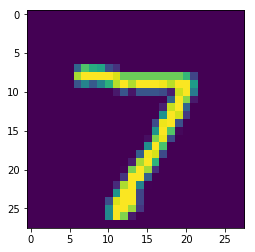

In [21]:
plt.imshow(image)

en niveaux de gris, sans graduation des axes, et avec le label comme titre :

Text(0.5, 1.0, '7')

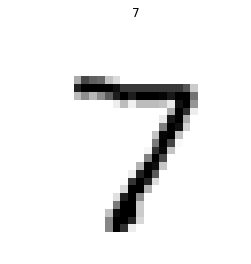

In [22]:
plt.imshow(image, cmap="gray_r")
plt.axis('off')
plt.title(y[0])

On redimensionne toutes les lignes :

In [23]:
n_samples = len(df.index)
images = images.reshape(n_samples,28,28)

NameError: name 'images' is not defined

On affiche les 50 premiers :

NameError: name 'images' is not defined

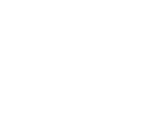

In [24]:
plt.figure(figsize=(10,20))
for i in range(0,49) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(images[i], cmap="gray_r")
    plt.title(y[i])

## Machine learning

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

In [ ]:
plot_learning_curve(rf, X, y)

In [ ]:
print(classification_report(y_test, y_rf))

In [ ]:
cm = confusion_matrix(y_test, y_rf)
print(cm)

### Exercice : tester Xgboost